### QLD Votes 2020

looking at the swings that happened last election

In [451]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import pickle

In [452]:
### import the position codes for our hextiles graph
hex2020 = pd.read_csv('Q2020hextiles.csv')

In [473]:
# some seats have changed name prior to 2017
# note that hill and macalister are not officially replacements for dalrymple and albert, but there is a lot of overlap
namechanges = {'cooper':'ashgrove', 'scenic rim': 'beaudesert','mcconnel': 'brisbane central','oodgeroo': 'cleveland',\
               'maiwar': 'indooroopilly', 'kurwongbah': 'kallangur','traeger': 'mount isa', 'toohey': 'sunnybank',\
               'miller': 'yeerongpilly', 'hill':'dalrymple', 'macalister': 'albert',}

namechangesrev = {v : k for k, v in namechanges.items()}

abolished = ['mount coot-tha']

newseats = ['bancroft', 'bonney', 'jordan', 'ninderry', 'theodore']

In [474]:
# a function to extract the relevant data fromeach election and transformit 

def electionSwingPrepper(year):
    yeardf = pd.read_pickle(f"./{year}_2PP_seats.pkl")
    yeardf = yeardf[['Seat','winning party', 'winning pc']]
    yeardf.rename(columns={'Seat': 'Seat', 'winning party': f'winning party {year}', 'winning pc': f'winning pc {year}'}, inplace=True)
    
    # replace NLP and LIB as LNP, blanks as IND
    yeardf[f'winning party {year}'] = yeardf[f'winning party {year}'].replace(['NPA','LIB'], "LNP")
    yeardf[f'winning party {year}'] = yeardf[f'winning party {year}'].replace('', 'IND')

    
    yeardf[f'winning pc {year}'] = pd.to_numeric(yeardf[f'winning pc {year}'], errors='coerce')
    
    
    # set the color 
    yeardf[f'color{year}'] = 'white'       # for blanks
    
    def colorPlotter(party,param1, param2, param3, c1, c2, c3):
    
        yeardf[f'color{year}'] = np.where((yeardf[f'winning pc {year}'] > param1) & (yeardf[f'winning pc {year}'] <= param2) & (yeardf[f'winning party {year}'] == party), c1, yeardf[f'color{year}'])
        yeardf[f'color{year}'] = np.where((yeardf[f'winning pc {year}'] > param2) & (yeardf[f'winning pc {year}'] <= param3) & (yeardf[f'winning party {year}'] == party), c2, yeardf[f'color{year}'])
        yeardf[f'color{year}'] = np.where((yeardf[f'winning pc {year}'] > param3) & (yeardf[f'winning pc {year}'] <= 100) & (yeardf[f'winning party {year}'] == party), c3, yeardf[f'color{year}'])
        
    colorPlotter("ALP",50,55,60,"salmon", "tomato", "darkred")
    colorPlotter("LNP",50,55,60,"deepskyblue", "blue", "navy")
    colorPlotter("GRN",50,55,60,"springgreen", "springgreen", "springgreen")
    colorPlotter("KAP",50,55,60,"khaki", "khaki", "khaki")
    colorPlotter("ONP",50,55,60,"orange", "orange", "orange")
    colorPlotter("IND",50,55,60,"dimgrey", "dimgrey", "dimgrey")    

    # rename seats that need it
    yeardf.Seat = yeardf.Seat.replace(namechangesrev) 

    return yeardf

## 2017

In [475]:
year = '2017'

yeardf = electionSwingPrepper(year)

yeardf.head(68)

,Seat,winning party 2017,winning pc 2017,color2017
0,algester,ALP,64.43,darkred
1,aspley,ALP,51.17,salmon
2,bancroft,ALP,56.21,tomato
3,barron river,ALP,51.86,salmon
4,bonney,LNP,51.69,deepskyblue
...,...,...,...,...
63,nicklin,LNP,55.28,blue
64,ninderry,LNP,58.38,blue
65,noosa,IND,61.53,dimgrey
66,nudgee,ALP,64.32,darkred


In [476]:
swingdf = yeardf.merge(hex2020, how="left")

swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y
0,algester,ALP,64.43,darkred,18.5,2.2
1,aspley,ALP,51.17,salmon,18.5,3.4
2,bancroft,ALP,56.21,tomato,17.0,3.7


([], <a list of 0 Text major ticklabel objects>)

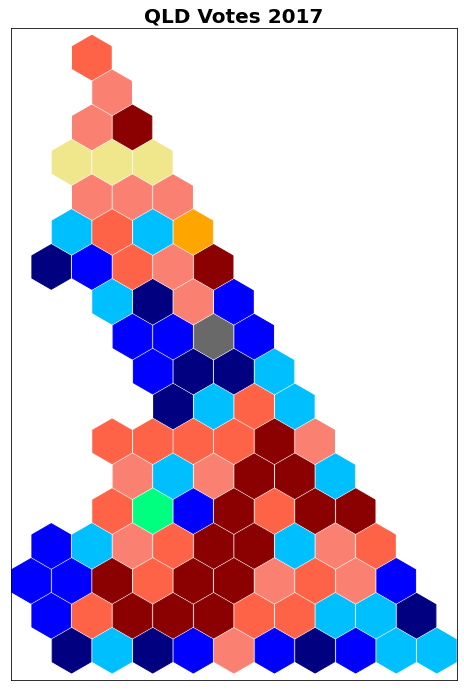

In [477]:
# map maker 

fig, ax = plt.subplots()
plt.title(f'QLD Votes 2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf[f'color{year}'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

# 2015 - 2017

In [478]:
year = '2015'

yeardf = electionSwingPrepper(year)

yeardf.head(3)

,Seat,winning party 2015,winning pc 2015,color2015
0,macalister,LNP,51.67,deepskyblue
1,algester,ALP,56.99,tomato
2,cooper,ALP,54.25,salmon


In [479]:
swingdf = swingdf.merge(yeardf, how="left")

swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

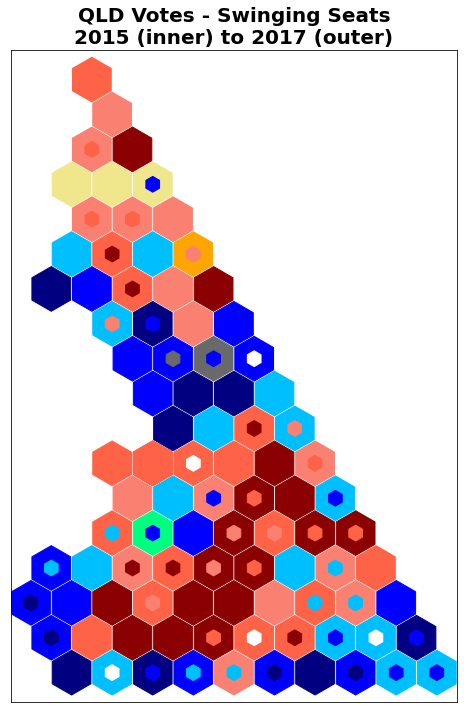

In [512]:
fig, ax = plt.subplots()
plt.title('QLD Votes - Swinging Seats\n2015 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2015'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

### 2012 - 2015

In [481]:
year = '2012'

yeardf = electionSwingPrepper(year)

yeardf.head(3)

,Seat,winning party 2012,winning pc 2012,color2012
0,macalister,LNP,61.89,navy
1,algester,LNP,59.15,blue
2,cooper,LNP,55.70,blue


In [482]:
swingdf = swingdf.merge(yeardf, how="left")

swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,winning pc 2012,color2012
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato,LNP,59.15,blue
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue,LNP,71.75,navy
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

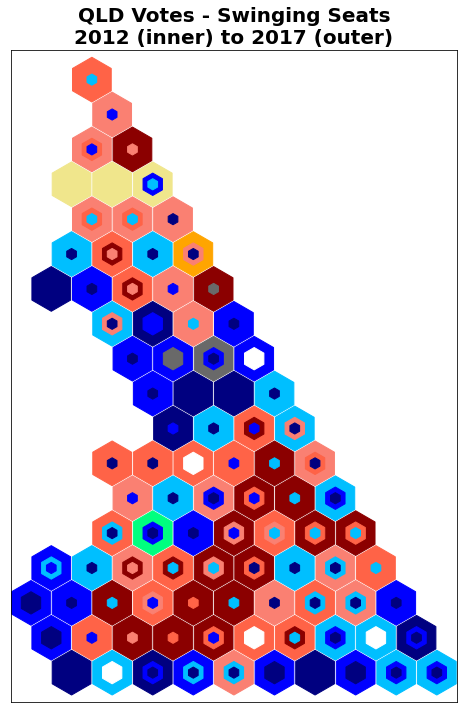

In [483]:
fig, ax = plt.subplots()
plt.title('QLD Votes - Swinging Seats\n2012 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=125, c=swingdf['color2012'])


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## 2009 - 2017

In [484]:
year = '2009'
yeardf = electionSwingPrepper(year)
yeardf.head(3)

,Seat,winning party 2009,winning pc 2009,color2009
0,macalister,ALP,56.47,tomato
1,algester,ALP,59.21,tomato
2,cooper,ALP,57.10,tomato


In [485]:
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new
swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,winning pc 2012,color2012,winning party 2009,winning pc 2009,color2009
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato,LNP,59.15,blue,ALP,59.21,tomato
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue,LNP,71.75,navy,LNP,54.46,deepskyblue
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

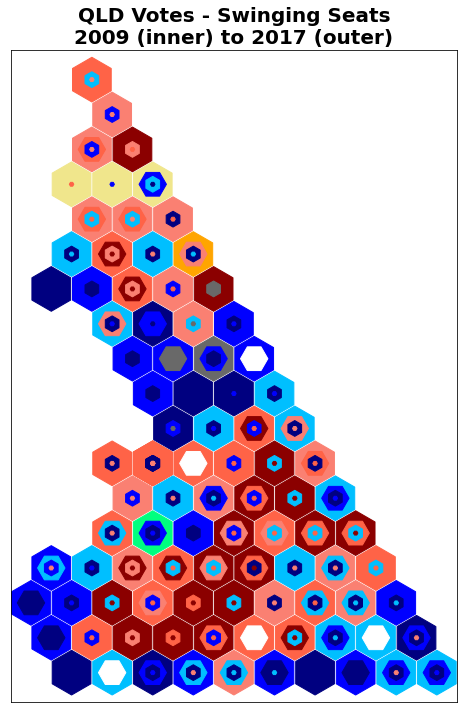

In [509]:
fig, ax = plt.subplots()
plt.title('QLD Votes - Swinging Seats\n2009 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=750, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=20, c=swingdf['color2009'])


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## 2006 - 2017

In [487]:
year = '2006'
yeardf = electionSwingPrepper(year)
yeardf.head(65)

,Seat,winning party 2006,winning pc 2006,color2006
0,macalister,ALP,67.01,darkred
1,algester,ALP,67.84,darkred
2,cooper,ALP,58.08,tomato
3,aspley,ALP,54.61,salmon
4,barron river,ALP,55.14,tomato
...,...,...,...,...
60,mundingburra,ALP,60.54,darkred
61,murrumba,ALP,61.58,darkred
62,nanango,IND,54.24,dimgrey
63,nicklin,IND,75.08,dimgrey


In [488]:
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new
swingdf.head(69)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,winning pc 2012,color2012,winning party 2009,winning pc 2009,color2009,winning party 2006,winning pc 2006,color2006
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato,LNP,59.15,blue,ALP,59.21,tomato,ALP,67.84,darkred
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue,LNP,71.75,navy,LNP,54.46,deepskyblue,ALP,54.61,salmon
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white
3,barron river,ALP,51.86,salmon,11.0,6.7,ALP,53.12,salmon,LNP,59.48,blue,ALP,52.32,salmon,ALP,55.14,tomato
4,bonney,LNP,51.69,deepskyblue,11.0,1.9,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,nicklin,LNP,55.28,blue,15.5,4.6,IND,64.89,dimgrey,IND,54.88,dimgrey,IND,66.31,dimgrey,IND,75.08,dimgrey
65,ninderry,LNP,58.38,blue,21.5,4.6,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white
66,noosa,IND,61.53,dimgrey,18.5,4.6,LNP,58.62,blue,LNP,75.46,navy,LNP,69.85,navy,LNP,56.32,blue
67,nudgee,ALP,64.32,darkred,24.5,3.4,ALP,61.25,darkred,LNP,53.11,deepskyblue,ALP,64.26,darkred,ALP,68.34,darkred


([], <a list of 0 Text major ticklabel objects>)

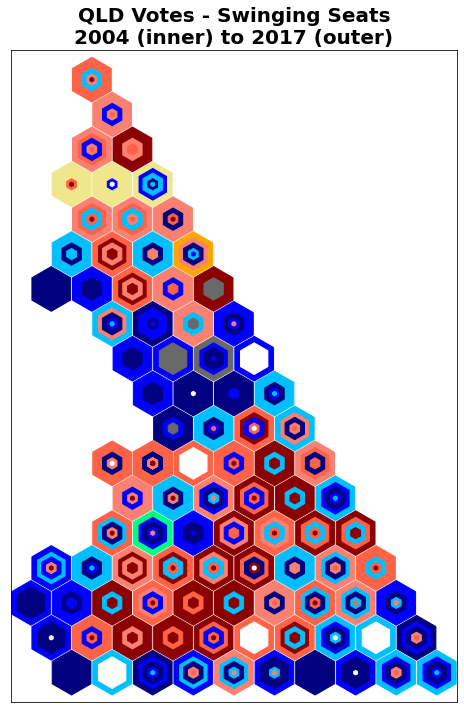

In [508]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=125, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=20, c=swingdf['color2006'])



plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

### 2004 -2007

In [490]:
year = '2004'
yeardf = electionSwingPrepper(year)
yeardf.head(3)

,Seat,winning party 2004,winning pc 2004,color2004
0,macalister,ALP,67.27,darkred
1,algester,ALP,67.97,darkred
2,cooper,ALP,64.69,darkred


In [491]:
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new
swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,...,color2012,winning party 2009,winning pc 2009,color2009,winning party 2006,winning pc 2006,color2006,winning party 2004,winning pc 2004,color2004
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato,LNP,...,blue,ALP,59.21,tomato,ALP,67.84,darkred,ALP,67.97,darkred
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue,LNP,...,navy,LNP,54.46,deepskyblue,ALP,54.61,salmon,ALP,54.32,salmon
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,...,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

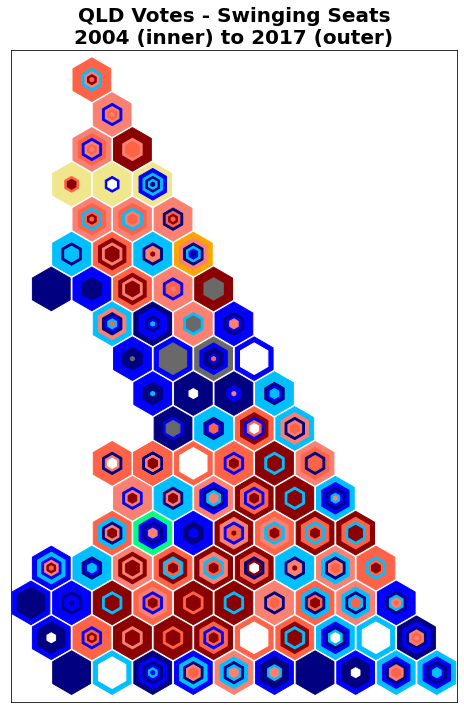

In [507]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1900, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=20, c=swingdf['color2004'])




plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

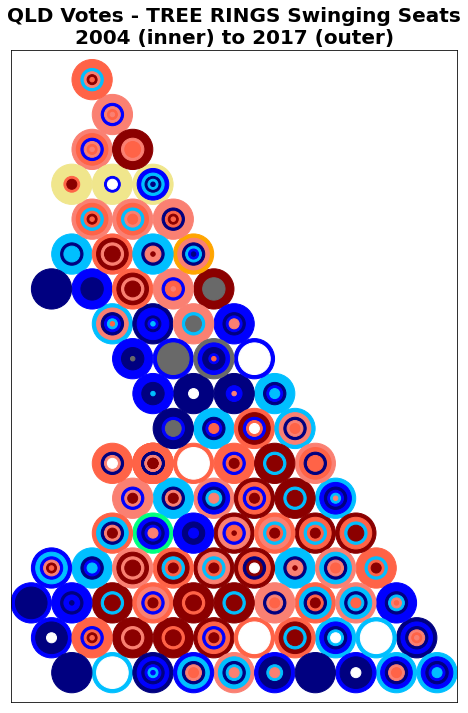

In [513]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - TREE RINGS Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=1620, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=20, c=swingdf['color2004'])




plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

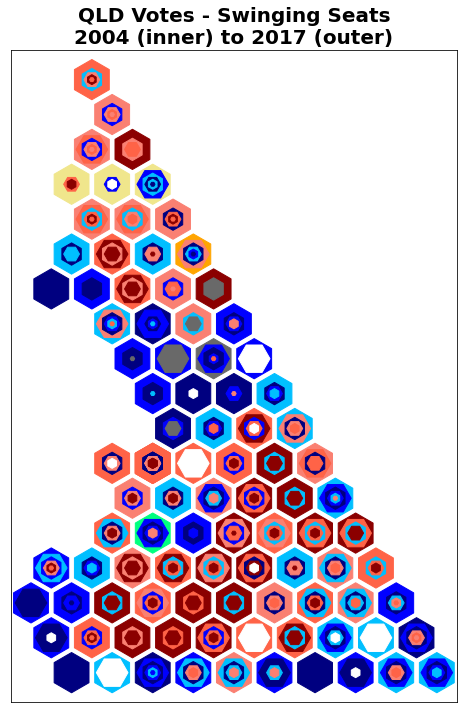

In [519]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=20, c=swingdf['color2004'])




plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## HOW OFTEN HAVE SEATS CHANGED HANDS

In [522]:
swingdf.head(2)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,...,color2012,winning party 2009,winning pc 2009,color2009,winning party 2006,winning pc 2006,color2006,winning party 2004,winning pc 2004,color2004
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato,LNP,...,blue,ALP,59.21,tomato,ALP,67.84,darkred,ALP,67.97,darkred
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue,LNP,...,navy,LNP,54.46,deepskyblue,ALP,54.61,salmon,ALP,54.32,salmon


In [535]:
freqdf = swingdf[['Seat','winning party 2017','winning party 2015','winning party 2012','winning party 2009','winning party 2006','winning party 2004']]

freqdf.head(2)

,Seat,winning party 2017,winning party 2015,winning party 2012,winning party 2009,winning party 2006,winning party 2004
0,algester,ALP,ALP,LNP,ALP,ALP,ALP
1,aspley,ALP,LNP,LNP,LNP,ALP,ALP


In [537]:
freqdf.loc[:,'ALP'  e

freqdf

c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Seat,winning party 2017,winning party 2015,winning party 2012,winning party 2009,winning party 2006,winning party 2004,ALP
0,algester,ALP,ALP,LNP,ALP,ALP,ALP,None
1,aspley,ALP,LNP,LNP,LNP,ALP,ALP,None
2,bancroft,ALP,NaN,NaN,NaN,NaN,NaN,None
3,barron river,ALP,ALP,LNP,ALP,ALP,ALP,None
4,bonney,LNP,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...
91,traeger,KAP,KAP,KAP,ALP,ALP,ALP,None
92,warrego,LNP,LNP,LNP,LNP,LNP,LNP,None
93,waterford,ALP,ALP,LNP,ALP,ALP,ALP,None
94,whitsunday,LNP,LNP,LNP,ALP,ALP,ALP,None


## SEATS THAT CHANGED HANDS

In [262]:
swingdf['seat retained'] = np.where(swingdf['winning party'] == swingdf['winning party 2015'],"Y","N")

In [263]:
t = []
for i, point in swingdf.iterrows(): 
    
    x = point['winning party']
    y = point['winning party 2015']
    
    if y ==  '--':
        color = 'lightgray'
                   
    elif x == y:
        color = 'lightgray'
        
    elif x == "ALP":
        color = 'tomato'
        
    elif x == "LNP":
        color = 'deepskyblue'
        
    elif x == "KAP":
        color = 'khaki'
        
    elif x == "GRN":
        color = 'springgreen'
       
    t.append(color)

swingdf['colorSR'] = t

In [264]:
swingdf = swingdf.merge(hex2020, how="left")

([], <a list of 0 Text major ticklabel objects>)

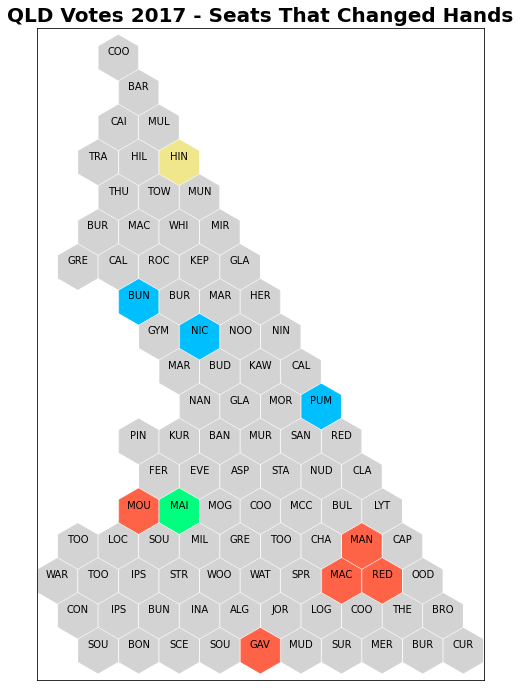

In [265]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Seats That Changed Hands', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSR'], )

for i, point in swingdf.iterrows():                
        #plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y']+0.05, point['Seat'][0:3].upper(),ha="center", va="center")
        
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## SWINGS TOWARDS LABOR

In [266]:
t = []

for i, point in swingdf.iterrows():
    
    if point['winning party 2015'] == "--":
        swingALP = '--'
        
    else:
        
        if point['winning party'] == 'ALP':
            now = float(point['winning pc'])
            
        else:
            now = 100.0 - float(point['winning pc'])
                     
        if point['winning party 2015'] == 'ALP':
                then = float(point['winning pc 2015'])
        else:
                then = 100.0 - float(point['winning pc 2015'])
            
        swingALP = round(now - then,2)
                
    t.append(swingALP)

swingdf['swingALP'] = t

In [267]:
r = []

for i in t: 
        
    if i ==  '--':
        color = 'lightgrey'
                   
    elif i == 0:
        color = 'white'
        
    elif i > 8:
        color = 'darkred'
        
    elif i > 4:
        color = 'tomato'
        
    elif i > 0:
        color = 'salmon'
        
    elif i < -8:
        color = 'navy'
        
    elif i < -4:
        color = 'deepskyblue'
        
    elif i < 0:
        color = 'lightsteelblue'
       
    r.append(color)

swingdf['colorSwingALP'] = r

([], <a list of 0 Text major ticklabel objects>)

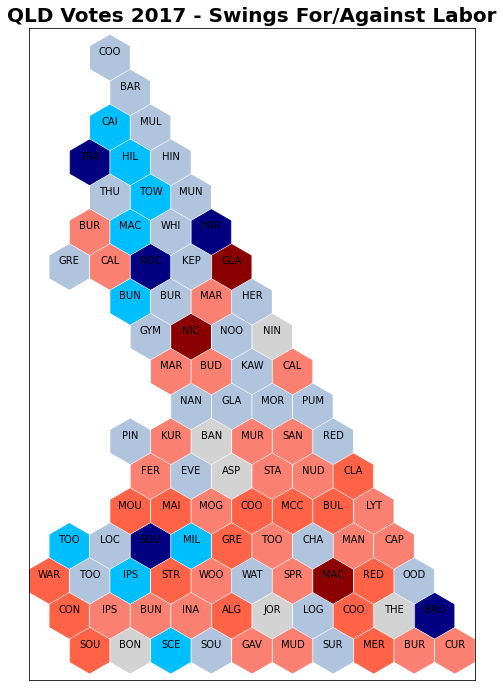

In [268]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Swings For/Against Labor', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSwingALP'], )

for i, point in swingdf.iterrows():                
        #plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y']+0.05, point['Seat'][0:3].upper(),ha="center", va="center")
        
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

### SWINGING SEATS 2017 v 2015

In [269]:
### set colors for 2017

swingdf['winning pc'] = pd.to_numeric(swingdf['winning pc'], errors='coerce')

r = []

for i, point in swingdf.iterrows():
    
    if point['winning party'] == "ALP":
        
        if point['winning pc'] > 60:
            color = 'darkred'
         
        elif point['winning pc'] > 55:
            color = 'tomato'
            
        elif point['winning pc'] > 50:
            color = 'salmon'

        
    if point['winning party'] == "LNP":
        
        if point['winning pc'] > 60:
            color = 'navy'
         
        elif point['winning pc'] > 55:
            color = 'deepskyblue'
            
        elif point['winning pc'] > 50:
            color = 'lightsteelblue'
        
    if point['winning party'] == "GRN":
        color = 'springgreen'
        
    if point['winning party'] == "KAP":
        color = 'khaki'
    
    r.append(color)

swingdf['color2017'] = r

In [270]:
### set colors for 2015

swingdf['winning pc 2015'] = pd.to_numeric(swingdf['winning pc 2015'], errors='coerce')

s = []

for i, point in swingdf.iterrows():
    
    if point['winning party 2015'] == "ALP":
        
        if point['winning pc 2015'] > 60:
            color = 'darkred'
         
        elif point['winning pc 2015'] > 55:
            color = 'tomato'
            
        elif point['winning pc 2015'] > 50:
            color = 'salmon'

        
    if point['winning party 2015'] == "LNP":
        
        if point['winning pc 2015'] > 60:
            color = 'navy'
         
        elif point['winning pc 2015'] > 55:
            color = 'deepskyblue'
            
        elif point['winning pc 2015'] > 50:
            color = 'lightsteelblue'
        
    if point['winning party 2015'] == "GRN":
        color = 'springgreen'
        
    if point['winning party 2015'] == "KAP":
        color = 'khaki'
        
    if point['winning party 2015'] == "--":
        color = 'lightgray'
    
    s.append(color)

swingdf['color2015'] = s

([], <a list of 0 Text major ticklabel objects>)

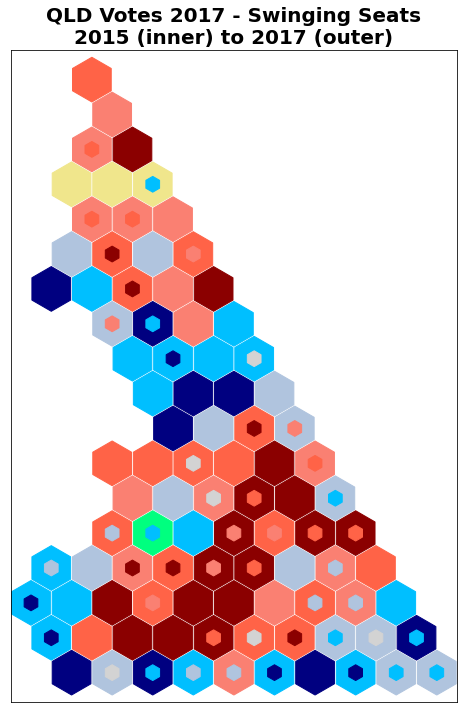

In [271]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Swinging Seats\n2015 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2015'], )

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

In [272]:
swingdf[['Seat','color2017','color2015']]

,Seat,color2017,color2015
0,algester,darkred,tomato
1,aspley,salmon,lightgray
2,bancroft,tomato,lightgray
3,barron river,salmon,salmon
4,bonney,lightsteelblue,lightgray
...,...,...,...
88,traeger,khaki,khaki
89,warrego,deepskyblue,navy
90,waterford,darkred,darkred
91,whitsunday,lightsteelblue,lightsteelblue


### 2012 to 2017

In [273]:
df2012 = pd.read_pickle("./2012_2PP_seats.pkl")
swing2012 = df2012[['Seat','winning party', 'winning pc']]
swing2012.rename(columns={'Seat': 'Seat', 'winning party': 'winning party 2012', 'winning pc': 'winning pc 2012'}, inplace=True)

c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [274]:
# some seats now have different names , scrapped etc
# this cell deals with that
# this is the readon for the gaps in the 2015 map

# note that some seats at end were abolished, but became the 2017 equiv. the last two were more or less replacements

names2017 = ['cooper','scenic rim','mcconnel','oodgeroo','maiwar', 'kurwongbah','traeger', 'toohey', 'miller', 'macalister','hill',]
names2015 = ['ashgrove','beaudesert','brisbane central','cleveland','indooroopilly', 'kallangur','mount isa', 'sunnybank', 'yeerongpilly','albert','dalrymple',]
for i in range(len(names2017)):
    swing2015['Seat'] = swing2015['Seat'].replace([names2015[i]],names2017[i])
    
# mount coot-tha is an out and out land grab on a space that didnt exist in 2017  

names2017 = ['aspley']
names2015 = ['mount coot-tha']
for i in range(len(names2017)):
    swing2015['Seat'] = swing2015['Seat'].replace([names2017[i]],names2015[i])

# these are new seats from 2017
todroplist = ['bancroft', 'bonney', 'jordan', 'ninderry', 'theodore']
for i in todroplist:
    todrop = swing2015.loc[swing2015['Seat']==i].index
    swing2015.drop(todrop, inplace=True)

swing2015.shape    #88,3

c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

(89, 3)

In [275]:
swingdf = swingdf.merge(swing2012, how="left")

swingdf

,Seat,winning party,winning pc,winning party 2015,winning pc 2015,seat retained,colorSR,x,y,swingALP,colorSwingALP,color2017,color2015,winning party 2012,winning pc 2012
0,algester,ALP,64.43,ALP,56.99,Y,lightgray,18.5,2.2,7.44,tomato,darkred,tomato,LNP,59.15
1,aspley,ALP,51.17,--,0.00,N,lightgray,18.5,3.4,--,lightgrey,salmon,lightgray,LNP,71.75
2,bancroft,ALP,56.21,--,0.00,N,lightgray,17.0,3.7,--,lightgrey,tomato,lightgray,NaN,NaN
3,barron river,ALP,51.86,ALP,53.12,Y,lightgray,11.0,6.7,-1.26,lightsteelblue,salmon,salmon,LNP,59.48
4,bonney,LNP,51.69,--,0.00,N,lightgray,11.0,1.9,--,lightgrey,lightsteelblue,lightgray,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,traeger,KAP,78.49,KAP,65.19,Y,lightgray,8.0,6.1,-13.3,navy,khaki,khaki,NaN,NaN
89,warrego,LNP,59.46,LNP,65.43,Y,lightgray,5.0,2.5,5.97,tomato,deepskyblue,navy,LNP,75.06
90,waterford,ALP,60.75,ALP,63.33,Y,lightgray,20.0,2.5,-2.58,lightsteelblue,darkred,darkred,LNP,51.04
91,whitsunday,LNP,50.68,LNP,50.38,Y,lightgray,14.0,5.5,-0.3,lightsteelblue,lightsteelblue,lightsteelblue,LNP,60.67


In [276]:
### set colors for 2012

swingdf['winning pc 2012'] = pd.to_numeric(swingdf['winning pc 2015'], errors='coerce')

s = []

for i, point in swingdf.iterrows():
    
    if point['winning party 2012'] == "ALP":
        
        if point['winning pc 2012'] > 60:
            color = 'darkred'
         
        elif point['winning pc 2012'] > 55:
            color = 'tomato'
            
        elif point['winning pc 2012'] > 50:
            color = 'salmon'

        
    if point['winning party 2012'] == "LNP":
        
        if point['winning pc 2012'] > 60:
            color = 'navy'
         
        elif point['winning pc 2012'] > 55:
            color = 'deepskyblue'
            
        elif point['winning pc 2012'] > 50:
            color = 'lightsteelblue'
        
    if point['winning party 2012'] == "GRN":
        color = 'springgreen'
        
    if point['winning party 2012'] == "KAP":
        color = 'khaki'
        
    if point['winning party 2012'] == "--":
        color = 'lightgray'
    
    s.append(color)

swingdf['color2012'] = s

([], <a list of 0 Text major ticklabel objects>)

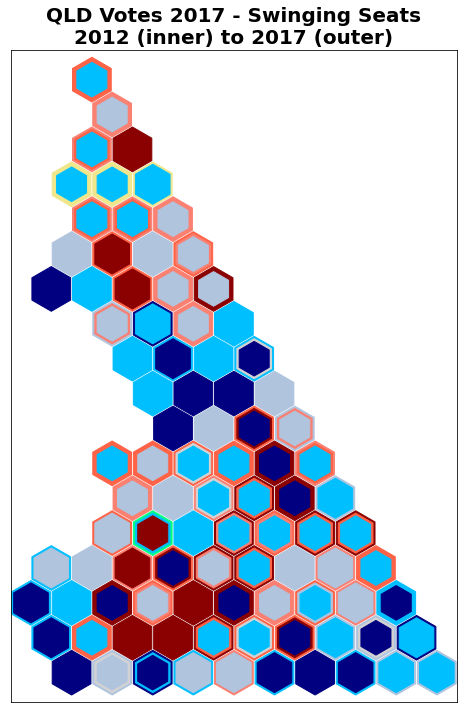

In [277]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Swinging Seats\n2012 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1600, c=swingdf['color2015'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1200, c=swingdf['color2012'], )

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

In [278]:
df2009 = pd.read_pickle("./2009_2PP_seats.pkl")
swing2009 = df2009[['Seat','winning party', 'winning pc']]
swing2009.rename(columns={'Seat': 'Seat', 'winning party': 'winning party 2009', 'winning pc': 'winning pc 2009'}, inplace=True)

c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [279]:
# some seats now have different names , scrapped etc
# this cell deals with that
# this is the readon for the gaps in the 2015 map

# note that some seats at end were abolished, but became the 2017 equiv. the last two were more or less replacements

names2017 = ['cooper','scenic rim','mcconnel','oodgeroo','maiwar', 'kurwongbah','traeger', 'toohey', 'miller', 'macalister','hill',]
names2015 = ['ashgrove','beaudesert','brisbane central','cleveland','indooroopilly', 'kallangur','mount isa', 'sunnybank', 'yeerongpilly','albert','dalrymple',]
for i in range(len(names2017)):
    swing2015['Seat'] = swing2015['Seat'].replace([names2015[i]],names2017[i])
    
# mount coot-tha is an out and out land grab on a space that didnt exist in 2017  

names2017 = ['aspley']
names2015 = ['mount coot-tha']
for i in range(len(names2017)):
    swing2015['Seat'] = swing2015['Seat'].replace([names2017[i]],names2015[i])

# these are new seats from 2017
todroplist = ['bancroft', 'bonney', 'jordan', 'ninderry', 'theodore']
for i in todroplist:
    todrop = swing2015.loc[swing2015['Seat']==i].index
    swing2015.drop(todrop, inplace=True)

swing2015.shape    #88,3

c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\jack\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

(89, 3)

In [280]:
swingdf = swingdf.merge(swing2009, how="left")

swingdf

,Seat,winning party,winning pc,winning party 2015,winning pc 2015,seat retained,colorSR,x,y,swingALP,colorSwingALP,color2017,color2015,winning party 2012,winning pc 2012,color2012,winning party 2009,winning pc 2009
0,algester,ALP,64.43,ALP,56.99,Y,lightgray,18.5,2.2,7.44,tomato,darkred,tomato,LNP,56.99,deepskyblue,ALP,59.21
1,aspley,ALP,51.17,--,0.00,N,lightgray,18.5,3.4,--,lightgrey,salmon,lightgray,LNP,0.00,deepskyblue,LNP,54.46
2,bancroft,ALP,56.21,--,0.00,N,lightgray,17.0,3.7,--,lightgrey,tomato,lightgray,NaN,0.00,deepskyblue,NaN,NaN
3,barron river,ALP,51.86,ALP,53.12,Y,lightgray,11.0,6.7,-1.26,lightsteelblue,salmon,salmon,LNP,53.12,lightsteelblue,ALP,52.32
4,bonney,LNP,51.69,--,0.00,N,lightgray,11.0,1.9,--,lightgrey,lightsteelblue,lightgray,NaN,0.00,lightsteelblue,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,traeger,KAP,78.49,KAP,65.19,Y,lightgray,8.0,6.1,-13.3,navy,khaki,khaki,NaN,65.19,deepskyblue,NaN,NaN
89,warrego,LNP,59.46,LNP,65.43,Y,lightgray,5.0,2.5,5.97,tomato,deepskyblue,navy,LNP,65.43,navy,LNP,74.34
90,waterford,ALP,60.75,ALP,63.33,Y,lightgray,20.0,2.5,-2.58,lightsteelblue,darkred,darkred,LNP,63.33,navy,ALP,66.46
91,whitsunday,LNP,50.68,LNP,50.38,Y,lightgray,14.0,5.5,-0.3,lightsteelblue,lightsteelblue,lightsteelblue,LNP,50.38,lightsteelblue,ALP,53.24


In [281]:
### set colors for 2009

swingdf['winning pc 2009'] = pd.to_numeric(swingdf['winning pc 2009'], errors='coerce')

s = []

for i, point in swingdf.iterrows():
    
    if point['winning party 2009'] == "ALP":
        
        if point['winning pc 2009'] > 60:
            color = 'darkred'
         
        elif point['winning pc 2009'] > 55:
            color = 'tomato'
            
        elif point['winning pc 2009'] > 50:
            color = 'salmon'

        
    if point['winning party 2009'] == "LNP":
        
        if point['winning pc 2009'] > 60:
            color = 'navy'
         
        elif point['winning pc 2009'] > 55:
            color = 'deepskyblue'
            
        elif point['winning pc 2009'] > 50:
            color = 'lightsteelblue'
        
    if point['winning party 2009'] == "GRN":
        color = 'springgreen'
        
    if point['winning party 2009'] == "KAP":
        color = 'khaki'
        
    if point['winning party 2009'] == "--":
        color = 'lightgray'
    
    s.append(color)

swingdf['color2009'] = s

([], <a list of 0 Text major ticklabel objects>)

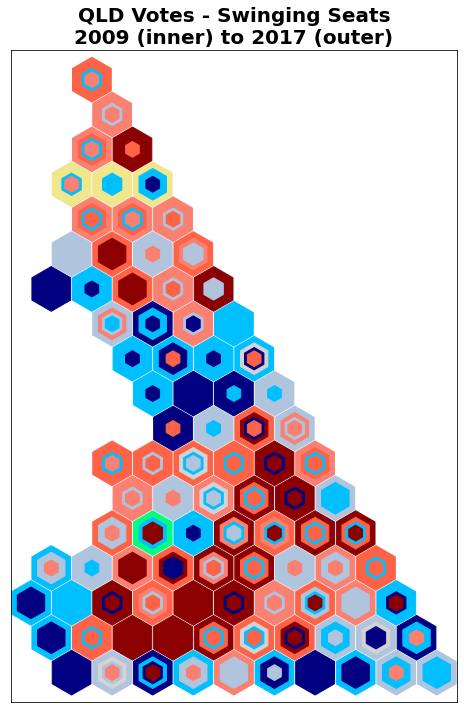

In [282]:
fig, ax = plt.subplots()
plt.title('QLD Votes - Swinging Seats\n2009 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2009'], )


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

In [283]:
s = []

for i, point in swingdf.iterrows():
    
    if point['winning party 2009'] == "ALP":
        
        if point['winning pc 2009'] > 60:
            color = 'darkred'
         
        elif point['winning pc 2009'] > 55:
            color = 'tomato'
            
        elif point['winning pc 2009'] > 50:
            color = 'salmon'

        
    if point['winning party 2009'] == "LNP":
        
        if point['winning pc 2009'] > 60:
            color = 'navy'
         
        elif point['winning pc 2009'] > 55:
            color = 'deepskyblue'
            
        elif point['winning pc 2009'] > 50:
            color = 'lightsteelblue'
        
    if point['winning party 2009'] == "GRN":
        color = 'springgreen'
        
    if point['winning party 2009'] == "KAP":
        color = 'khaki'
        
    if point['winning party 2009'] == "--":
        color = 'lightgray'
    
    s.append(color)

swingdf['color2009'] = s



# make color
    
    def assignColor(party,verysafe,safe,marginal):
    
        if point[f'winning party {year}'] == party:
        
            if point[f'winning party {year}'] > 60:
                color = verysafe

            elif point[f'winning party {year}'] > 55:
                color = safe

            elif point['winning pc 2009'] > 50:
                color = marginal
                
        return color

    s = []
    for i, point in swingdf.iterrows():
        
        color = assignColor("ALP","darkred","tomato","salmon" )
        
        
        s.append(color)

        yeardf[f'color{year}'] = s
        
         if point[f'winning pc {year}'] > 60:
            yeardf['color'] = "verysafe"

    elif point[f'winning pc {year}'] > 55:
            yeardf['color'] = "safe"

    elif point[f'winning pc {year}'] > 50:
            

IndentationError: unexpected indent (<ipython-input-283-82ba3ae12e2f>, line 45)

## 2006-2017 SWING

In [294]:
year = '2004'

def electionSwingPrepper(year):
    yeardf = pd.read_pickle(f"./{year}_2PP_seats.pkl")
    yeardf = yeardf[['Seat','winning party', 'winning pc']]
    yeardf.rename(columns={'Seat': 'Seat', 'winning party': f'winning party {year}', 'winning pc': f'winning pc {year}'}, inplace=True)
    
    yeardf[f'winning pc {year}'] = pd.to_numeric(yeardf[f'winning pc {year}'], errors='coerce')
    
    yeardf['is_safe'] = np.where(yeardf[f'winning pc {year}'] >= 60, 'yes', 'no')
    
    yeardf[f'color{year}'] = 'white'
    
    def colorPlotter(party,param1, param2, cc):
    
        yeardf[f'color{year}'] = np.where((yeardf[f'winning pc {year}'] > param1) & (yeardf[f'winning pc {year}'] <= param2) & (yeardf[f'winning party {year}'] == party), cc, yeardf[f'color{year}'])

    colorPlotter("ALP",50,55,"salmon")
    colorPlotter("ALP",55,60,"tomato")
    colorPlotter("ALP",60,100,"darkred")
    
    colorPlotter("NPA",50,55,"deepskyblue")
    colorPlotter("NPA",55,60,"blue")
    colorPlotter("NPA",60,100,"navy")
    
    colorPlotter("LIB",60,100,"navy")
    colorPlotter("LIB",55,60,"blue")
    colorPlotter("LIB",50,55,"deepskyblue")
    
    colorPlotter("IND",50,100,"silver")
    
    
    
    
    
    
    # some seats now have different names , scrapped etc
    # this cell deals with that
    # this is the readon for the gaps in the 2015 map

    # note that some seats at end were abolished, but became the 2017 equiv. the last two were more or less replacements

    names2017 = ['cooper','scenic rim','mcconnel','oodgeroo','maiwar', 'kurwongbah','traeger', 'toohey', 'miller', 'macalister','hill',]
    names2015 = ['ashgrove','beaudesert','brisbane central','cleveland','indooroopilly', 'kallangur','mount isa', 'sunnybank', 'yeerongpilly','albert','dalrymple',]
    for i in range(len(names2017)):
        yeardf['Seat'] = yeardf['Seat'].replace([names2015[i]],names2017[i])

    # mount coot-tha is an out and out land grab on a space that didnt exist in 2017  

    names2017 = ['aspley']
    names2015 = ['mount coot-tha']
    for i in range(len(names2017)):
        yeardf['Seat'] = yeardf['Seat'].replace([names2017[i]],names2015[i])

    # these are new seats from 2017
    todroplist = ['bancroft', 'bonney', 'jordan', 'ninderry', 'theodore']
    for i in todroplist:
        todrop = yeardf.loc[yeardf['Seat']==i].index
        yeardf.drop(todrop, inplace=True)

    yeardf.shape    #88,3
    
    
    
    return yeardf

yeardf = electionSwingPrepper(year)


swingdf = swingdf.merge(yeardf, how="left")


yeardf.head(5)


,Seat,winning party 2004,winning pc 2004,is_safe,color2004
0,macalister,ALP,67.27,yes,darkred
1,algester,ALP,67.97,yes,darkred
2,cooper,ALP,64.69,yes,darkred
3,mount coot-tha,ALP,54.32,no,salmon
4,barron river,ALP,53.12,no,salmon


In [295]:
swingdf[f'color{year}'] = swingdf[f'color{year}'].where(pd.notnull(swingdf[f'color{year}']), 'white')

swingdf.head(15)

,Seat,winning party,winning pc,winning party 2015,winning pc 2015,seat retained,colorSR,x,y,swingALP,...,winning party 2009,winning pc 2009,color2009,winning party 2006,winning pc 2006,is_safe,color2006,winning party 2004,winning pc 2004,color2004
0,algester,ALP,64.43,ALP,56.99,Y,lightgray,18.5,2.2,7.44,...,ALP,59.21,tomato,ALP,67.84,yes,darkred,ALP,67.97,darkred
1,aspley,ALP,51.17,--,0.00,N,lightgray,18.5,3.4,--,...,LNP,54.46,lightsteelblue,NaN,NaN,NaN,white,NaN,NaN,white
2,bancroft,ALP,56.21,--,0.00,N,lightgray,17.0,3.7,--,...,NaN,NaN,lightsteelblue,NaN,NaN,NaN,white,NaN,NaN,white
3,barron river,ALP,51.86,ALP,53.12,Y,lightgray,11.0,6.7,-1.26,...,ALP,52.32,salmon,ALP,55.14,no,tomato,ALP,53.12,salmon
4,bonney,LNP,51.69,--,0.00,N,lightgray,11.0,1.9,--,...,NaN,NaN,salmon,NaN,NaN,NaN,white,NaN,NaN,white
5,broadwater,LNP,67.98,LNP,57.19,Y,lightgray,33.5,2.2,-10.79,...,ALP,52.03,salmon,ALP,55.21,no,tomato,ALP,54.06,salmon
6,buderim,LNP,61.41,LNP,62.16,Y,lightgray,17.0,4.3,0.75,...,LNP,64.28,navy,NaN,NaN,NaN,white,NaN,NaN,white
7,bulimba,ALP,60.78,ALP,56.14,Y,lightgray,26.0,3.1,4.64,...,ALP,57.77,tomato,ALP,66.24,yes,darkred,ALP,68.45,darkred
8,bundaberg,LNP,54.20,ALP,51.62,N,deepskyblue,11.0,4.9,-5.82,...,LNP,56.02,deepskyblue,NPA,50.95,no,deepskyblue,ALP,55.29,tomato
9,bundamba,ALP,71.55,ALP,71.43,Y,lightgray,12.5,2.2,0.12,...,ALP,71.23,darkred,ALP,74.78,yes,darkred,ALP,74.89,darkred


([], <a list of 0 Text major ticklabel objects>)

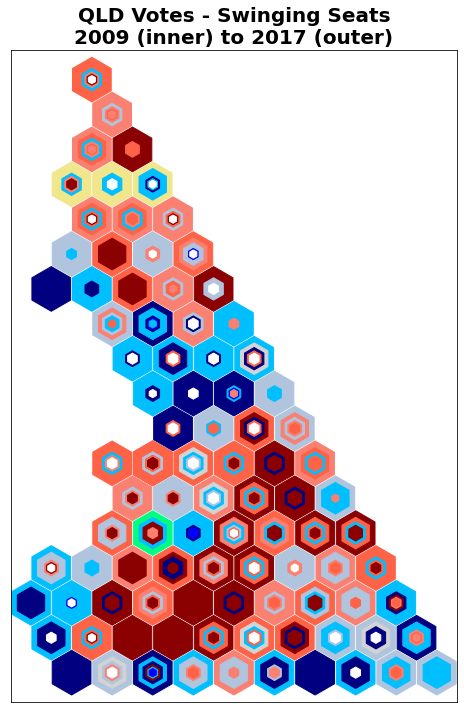

In [299]:
fig, ax = plt.subplots()
plt.title('QLD Votes - Swinging Seats\n2009 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2009'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=125, c=swingdf['color2006'], )

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=67, c=swingdf['color2004'], )


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

# STAND VIEW OF SWING PER WINNING PARTY PER SEAT

In [442]:
t = []
for i, point in swingdf.iterrows():
    
    if point['winning party 2015'] == "--":
        
        t.append('--')
        
    else:
            
        now = float(point['winning pc'])
            
        if point['seat retained'] == "Y":
            then = float(point['winning pc 2015'])
                
        elif point['seat retained'] == "N":
            then = 100.0 - float(point['winning pc 2015'])
                
    t.append(round(now - then,2))

swingdf['swing'] = t

ValueError: Length of values does not match length of index

In [438]:
swingdf.head(40)

,Seat,winning party,winning pc,winning party 2015,winning pc 2015,seat retained,colorSR,x,y,swingALP,colorSwingALP,color2017,color2015,swing,colorSwingGeneral
0,algester,ALP,64.43,ALP,56.99,Y,lightgray,18.5,2.2,7.44,tomato,darkred,tomato,tbc,tomato
1,aspley,ALP,51.17,--,0.00,N,lightgray,18.5,3.4,--,lightgrey,salmon,lightgray,tbc,tomato
2,bancroft,ALP,56.21,--,0.00,N,lightgray,17.0,3.7,--,lightgrey,tomato,lightgray,tbc,tomato
3,barron river,ALP,51.86,ALP,53.12,Y,lightgray,11.0,6.7,-1.26,lightsteelblue,salmon,salmon,tbc,tomato
4,bonney,LNP,51.69,--,0.00,N,lightgray,11.0,1.9,--,lightgrey,lightsteelblue,lightgray,tbc,deepskyblue
5,broadwater,LNP,67.98,LNP,57.19,Y,lightgray,33.5,2.2,-10.79,navy,navy,deepskyblue,tbc,deepskyblue
6,buderim,LNP,61.41,LNP,62.16,Y,lightgray,17.0,4.3,0.75,salmon,navy,navy,tbc,deepskyblue
7,bulimba,ALP,60.78,ALP,56.14,Y,lightgray,26.0,3.1,4.64,tomato,darkred,tomato,tbc,tomato
8,bundaberg,LNP,54.20,ALP,51.62,N,deepskyblue,11.0,4.9,-5.82,deepskyblue,lightsteelblue,salmon,tbc,deepskyblue
9,bundamba,ALP,71.55,ALP,71.43,Y,lightgray,12.5,2.2,0.12,salmon,darkred,darkred,tbc,tomato


In [434]:
swingdf['colorSwingGeneral'] = np.where(swingdf['winning party'] == 'ALP', 'tomato', np.where(swingdf['winning party'] == 'GRN', 'springgreen', np.where(swingdf['winning party'] == 'KAP', 'lightgrey', 'deepskyblue')))

In [435]:
swingdf

,Seat,winning party,winning pc,winning party 2015,winning pc 2015,seat retained,colorSR,x,y,swingALP,colorSwingALP,color2017,color2015,swing,colorSwingGeneral
0,algester,ALP,64.43,ALP,56.99,Y,lightgray,18.5,2.2,7.44,tomato,darkred,tomato,tbc,tomato
1,aspley,ALP,51.17,--,0.00,N,lightgray,18.5,3.4,--,lightgrey,salmon,lightgray,tbc,tomato
2,bancroft,ALP,56.21,--,0.00,N,lightgray,17.0,3.7,--,lightgrey,tomato,lightgray,tbc,tomato
3,barron river,ALP,51.86,ALP,53.12,Y,lightgray,11.0,6.7,-1.26,lightsteelblue,salmon,salmon,tbc,tomato
4,bonney,LNP,51.69,--,0.00,N,lightgray,11.0,1.9,--,lightgrey,lightsteelblue,lightgray,tbc,deepskyblue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,traeger,KAP,78.49,KAP,65.19,Y,lightgray,8.0,6.1,-13.3,navy,khaki,khaki,tbc,lightgrey
89,warrego,LNP,59.46,LNP,65.43,Y,lightgray,5.0,2.5,5.97,tomato,deepskyblue,navy,tbc,deepskyblue
90,waterford,ALP,60.75,ALP,63.33,Y,lightgray,20.0,2.5,-2.58,lightsteelblue,darkred,darkred,tbc,tomato
91,whitsunday,LNP,50.68,LNP,50.38,Y,lightgray,14.0,5.5,-0.3,lightsteelblue,lightsteelblue,lightsteelblue,tbc,deepskyblue


In [214]:
# Now to map the swing

([], <a list of 0 Text major ticklabel objects>)

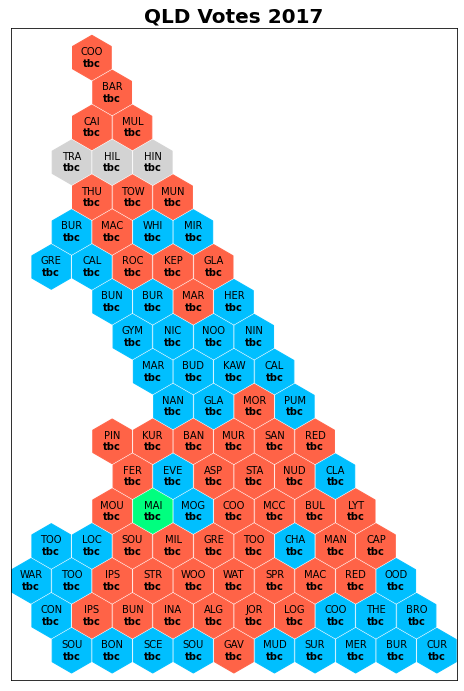

In [436]:

swingdf = swingdf.merge(hex2020, how="left")

fig, ax = plt.subplots()
plt.title('QLD Votes 2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSwingGeneral'], )
for i, point in swingdf.iterrows():                
        plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y']+0.05, point['Seat'][0:3].upper(),ha="center", va="center")
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

In [ ]:
    #yeardf['is_safe'] = np.where(yeardf[f'winning pc {year}'] >= 60, 'yes', 'no')
